In [ ]:
import cv2
import os
import numpy as np
import pandas as pd
import seaborn as sns
import random
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.utils import shuffle
import glob
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Input,Conv2D, Dense, Flatten ,Dropout ,MaxPooling2D,BatchNormalization,GlobalAveragePooling2D
from tensorflow.keras import layers, Sequential
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from PIL import Image
import tensorflow as tf
from tensorflow import keras
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import kagglehub
path = kagglehub.dataset_download("navoneel/brain-mri-images-for-brain-tumor-detection")
print("Path to dataset files:", path)

100%|██████████| 15.1M/15.1M [00:00<00:00, 138MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/navoneel/brain-mri-images-for-brain-tumor-detection/versions/1


In [ ]:
path_No = path + "/no/*"
path_Yes = path + "/yes/*"

In [ ]:
tumor = []
no_tumor = []
for file in glob.iglob(path_Yes):
    img = cv2.imread(file)
    if img is not None:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (128, 128))
        tumor.append((img, 1))


for file in glob.iglob(path_No):
    img = cv2.imread(file)
    if img is not None:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (128, 128))
        no_tumor.append((img, 0))

all_data = tumor + no_tumor

np.random.seed(42)
np.random.shuffle(all_data)


data = np.array([item[0] for item in all_data])  # Images
labels = np.array([item[1] for item in all_data])  # Labels

In [ ]:

print("Number of images with Tumor:", len(tumor))
print("Number of images without Tumor:", len(no_tumor))
print("Total number of images:", len(all_data))

Number of images with Tumor: 155
Number of images without Tumor: 98
Total number of images: 253


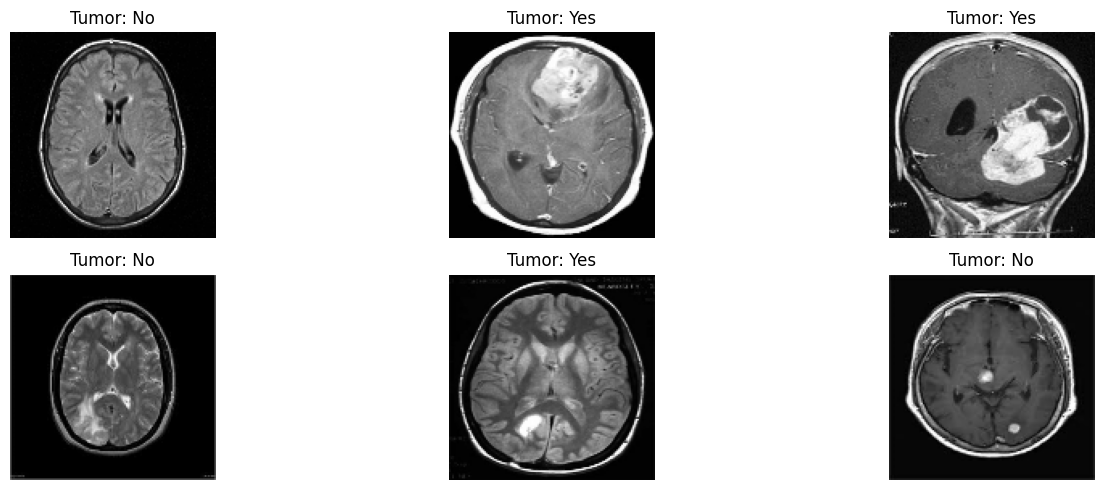

In [ ]:

plt.figure(figsize=(15, 5))

for i in range(min(6, len(all_data))):
    plt.subplot(2, 3, i+1)
    plt.imshow(data[i])
    plt.title("Tumor: " + ("Yes" if labels[i] == 1 else "No"))
    plt.axis('off')

plt.tight_layout()
plt.show()

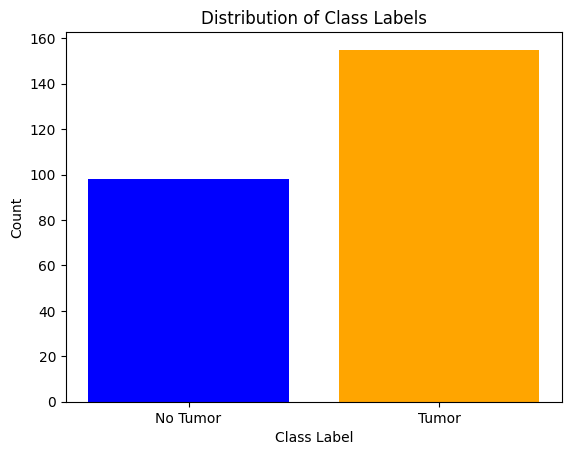

In [ ]:
unique_labels, label_counts = np.unique(labels, return_counts=True)

plt.bar(unique_labels, label_counts, color=['blue', 'orange'])
plt.xticks(unique_labels, ['No Tumor', 'Tumor'])
plt.xlabel('Class Label')
plt.ylabel('Count')
plt.title('Distribution of Class Labels')
plt.show()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.20, random_state=42)

In [ ]:
x_train= x_train /255.0
x_test = x_test / 255.0

In [ ]:
print("Minimum value of the scaled data:", x_train.min())
print("Maximum value of the scaled data:",  x_train.max())

Minimum value of the scaled data: 0.0
Maximum value of the scaled data: 1.0


In [ ]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='Adam',loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,304,769 (12.61 MB)

 Trainable params: 3,304,769 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') > 0.99:
            print("\nReached 99% accuracy so cancelling training!")
            self.model.stop_training = True

back = myCallback()

In [ ]:
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2, callbacks=[back])

Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.7335 - loss: 0.6191 - val_accuracy: 0.6098 - val_loss: 0.6157
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 941ms/step - accuracy: 0.7782 - loss: 0.4916 - val_accuracy: 0.6585 - val_loss: 0.6448
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 10s 959ms/step - accuracy: 0.7491 - loss: 0.5070 - val_accuracy: 0.6098 - val_loss: 0.7543
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.8401 - loss: 0.4373 - val_accuracy: 0.6829 - val_loss: 0.5922
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.8247 - loss: 0.4817 - val_accuracy: 0.6585 - val_loss: 0.6379
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.7710 - loss: 0.4849 - val_accuracy: 0.6585 - val_loss: 0.6544
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 8s 946ms/step - accuracy: 0.8039 - loss: 0.4644 - val_accuracy: 0.7317 - val_loss: 0.5973
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.8130 - loss: 0.4743 - val_accuracy: 0.6585 - val_loss: 0.7190
Ep

In [ ]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_acc)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step - accuracy: 0.8094 - loss: 0.4546
Test Loss: 0.42597296833992004
Test Accuracy: 0.8235294222831726
